In [21]:
import numpy as np 
import pandas as pd 
import os 
import h5py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
hf = h5py.File('Dataset/part_A_train.h5', 'r')
X = np.array(hf['X'])
Y = np.array(hf['Y'])
print(X.shape,Y.shape)

""" To calculate the class frequencies """

for i in range(Y.shape[1]):
    freq = np.sum(Y[:,i])
    print("The frequency of class " + str(i) + " is " + str(freq) + " / " + str(Y.shape[0]) )

y = []
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        if(Y[i,j] == 1):
            y.append(j)
y = np.array(y)
Y = y.reshape(-1,1)
Y = np.squeeze(Y)
# print(X[0])
print(Y.shape)

(4200, 784) (4200, 10)
The frequency of class 0 is 400.0 / 4200
The frequency of class 1 is 494.0 / 4200
The frequency of class 2 is 393.0 / 4200
The frequency of class 3 is 424.0 / 4200
The frequency of class 4 is 416.0 / 4200
The frequency of class 5 is 398.0 / 4200
The frequency of class 6 is 441.0 / 4200
The frequency of class 7 is 431.0 / 4200
The frequency of class 8 is 410.0 / 4200
The frequency of class 9 is 393.0 / 4200
(4200,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
standardScalar = StandardScaler()
X_train = standardScalar.fit_transform(X_train)
X_test = standardScalar.transform(X_test)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(random_state = 123,n_components = 50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [6]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.06327579 0.04597528 0.03972614 0.03382077 0.02900687 0.02465617
 0.02063794 0.01982879 0.01729555 0.01549596 0.01516823 0.01321109
 0.01273773 0.01236947 0.01162282 0.01150743 0.01063814 0.01057076
 0.00979194 0.0096969  0.00926483 0.00910479 0.00885184 0.00866194
 0.00849303 0.00807979 0.00792032 0.00774736 0.00752252 0.00716454
 0.00702823 0.00683316 0.00672893 0.00651419 0.00639368 0.00628106
 0.0062595  0.00611504 0.00596377 0.00590448 0.00578223 0.00568126
 0.00550676 0.0054311  0.00531628 0.0051776  0.00504468 0.00494904
 0.00486129 0.00464602]


In [7]:
print(X_train.shape)


(3360, 50)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [9]:
logistic = LogisticRegression(solver = "saga", max_iter  = 10000)
logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)
y_pred = logistic.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

pres_score = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print(acc_score, pres_score, f1)


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.8797619047619047 0.8738925644826798 0.8710026510513111


In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.027s...
[t-SNE] Computed neighbors for 3360 samples in 2.699s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.441751
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.590019
[t-SNE] KL divergence after 1000 iterations: 1.286411


In [12]:
import pickle 
f = open("Pickle_files/tnse_pca_2d", "wb")
pickle.dump(tsne_em,f)

In [13]:
tsne_em[:,0].shape,tsne_em[:,1].shape

((3360,), (3360,))

In [14]:
df_tsne_pca_2d = pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne_pca_2d["x"] = tsne_em[:,0]
df_tsne_pca_2d["y"] = tsne_em[:,1]
df_tsne_pca_2d["label"] = y_train

In [15]:
df_tsne_pca_2d.head()

,x,y,label
0,-5.470888,-0.007008,3
1,15.401709,-10.645580,5
2,0.695574,29.218504,4
3,-19.034721,-58.817848,6
4,-13.161193,10.523849,8


In [16]:
df_tsne_pca_2d["label"].value_counts()

1    388
6    353
8    346
4    341
9    333
3    331
7    326
5    318
0    315
2    309
Name: label, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
sns.scatterplot(x = df_tsne_pca_2d["x"], y = df_tsne_pca_2d["y"], hue = df_tsne_pca_2d["label"], palette = sns.color_palette("husl", 10) )
plt.show()

<Figure size 1000x1000 with 1 Axes>

In [18]:
""" Applying SVD of the provided dataset """

' Applying SVD of the provided dataset '

In [25]:
from sklearn.decomposition import TruncatedSVD

In [26]:
svd  = TruncatedSVD(random_state = 123,n_components = 50)
svd.fit(X_train)
# apply transform to dataset
X_train = svd.transform(X_train)
X_test = svd.transform(X_test)

In [27]:
print(X_train.shape)

(3360, 50)


In [28]:
logistic = LogisticRegression(solver = "sag")
logistic.fit(X_train, y_train)

test_score = logistic.score(X_test, y_test)
y_pred = logistic.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

pres_score = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print(acc_score, pres_score, f1)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8714285714285714 0.8661496019285314 0.8617714893038437


In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.020s...
[t-SNE] Computed neighbors for 3360 samples in 3.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.446044
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.597336
[t-SNE] KL divergence after 1000 iterations: 1.275151


In [31]:
import pickle 
f = open("Pickle_files/tnse_svd_2d", "wb")
pickle.dump(tsne_em,f)

In [32]:
df_tsne_svd_2d = pd.DataFrame(columns = ["x", "y", "label"] )
df_tsne_svd_2d["x"] = tsne_em[:,0]
df_tsne_svd_2d["y"] = tsne_em[:,1]
df_tsne_svd_2d["label"] = y_train

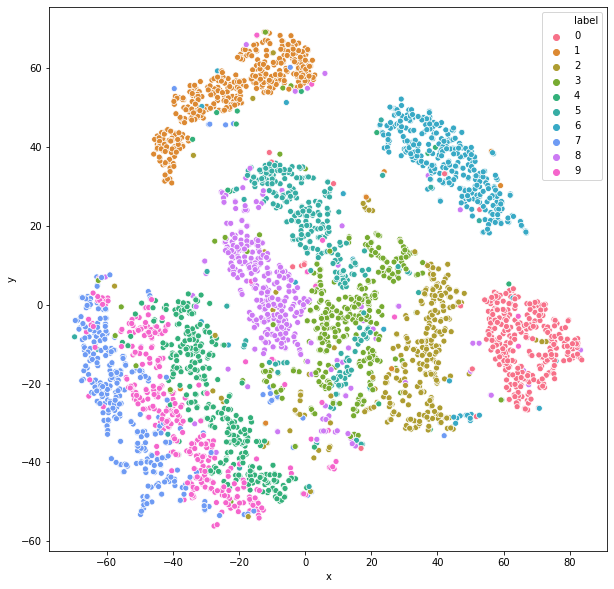

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
# plt.scatter(tsne_em[:,0], tsne_em[:,1],color = "green", hue = y_train);
sns.scatterplot(x = df_tsne_svd_2d["x"], y = df_tsne_svd_2d["y"], hue = df_tsne_svd_2d["label"], palette = sns.color_palette("husl", 10) )
plt.show()